In [1]:
# Building an image classification Convolutional Neural Network
# CNNs are used in signals analysis and pattern finding.
# We will use a keras dataset of many images that have 10 possible classifications
# that is, trains, plains, cars, etc. 
# we will use this dataset to train the NN and then apply the model to images from the internet
# to assess the NNs classification accuracy


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


# now, we will retrieve the data from keras
(train_img, train_label), (test_img, test_label) = datasets.cifar10.load_data() # .load_data() loads data into the 2 tuples

In [2]:
# we will now NORMALIZE/scale the data, the pixels are activated from 0-255 
# activation occurs depending on the brightness of the pixel
# we will scale data to be from 0 to 1 instead of 0 to 255.

train_img, test_img = train_img/255, test_img/255

In [3]:
# We will now define a class names list and visualize some images from the dataset
# we have numbers [1,2,3...] instead of labels such as "car", etc
# it is important to keep the same order as the labels dataset

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
# the objects that the NN will be able to classify 

print(np.unique(test_label))

[0 1 2 3 4 5 6 7 8 9]


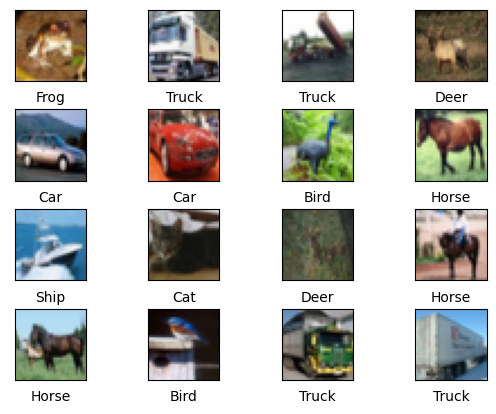

In [15]:
# keep in mind that the NN may fail to recognize the difference between deer and horse as these may look similar
# additionally, the images have low resolution

# now, we will visualize some of the images

for i in range(16):
    plt.subplot(4,4,i+1) # 4x4 grid with each iteration we select one of the places in the grid to place an image
    plt.xticks([]) # no coordinate systems
    plt.yticks([])
    plt.imshow(train_img[i], cmap = plt.cm.binary) # showing training image with index i (1st 16), using binary colormap
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.xlabel(class_names[train_label[i][0]]) # below each image we will list the label of the class name
                           
plt.show()

In [16]:
# 50k training images!
print(len(train_img))

50000


In [17]:
# 10k training images! 
print(len(test_img))

10000


In [19]:
# Building/Training the model

# Defining the NN as a Sequential model 

model = models.Sequential()

# Defining the input layer 
# the input layer is a CONVOLUTIONAL layer 

# 32 neurons; (3,3) convolutional matrix/filter; input shape of 32x32 pixels (image resolution), 3 color channels (RGB)
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))

# Defining the MAX POOLING 2D layer , which simplifies the result and reduces it to the essential information
          
model.add(layers.MaxPooling2D((2,2)))

# Adding another convolutional layer          
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
# Adding another max pooling 2D layer
model.add(layers.MaxPooling2D((2,2)))
# Final convolutional layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))
          
# Flattening what we get out of this (10x10 matrix becomes 100x1 vector)
model.add(layers.Flatten())
          
# Adding 2 DENSE layers with 64 units and relu activation 
          
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
          
# Output layer - outputs a probability distribution
model.add(layers.Dense(10, activation = 'softmax'))
          
# COMPILING the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          
model.fit(train_img, train_label, epochs = 10, validation_data= (test_img, test_label))

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.5636 - accuracy: 0.4253 - val_loss: 1.2557 - val_accuracy: 0.5485
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1853 - accuracy: 0.5766 - val_loss: 1.1333 - val_accuracy: 0.5939
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0336 - accuracy: 0.6328 - val_loss: 1.0905 - val_accuracy: 0.6217
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9406 - accuracy: 0.6665 - val_loss: 0.9467 - val_accuracy: 0.6729
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8668 - accuracy: 0.6949 - val_loss: 0.9622 - val_accuracy: 0.6577
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8118 - accuracy: 0.7136 - val_loss: 0.9388 - val_accuracy: 0.6731
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7689 - accuracy: 0.7291 - val_loss: 0.8742 -

In [20]:
# Evaluating the model 

loss, accuracy = model.evaluate(test_img, test_label)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 2s 5ms/step - loss: 0.8916 - accuracy: 0.7070
Loss: 0.891609251499176
Accuracy: 0.7070000171661377


In [21]:
model.save('img_class.model')

INFO:tensorflow:Assets written to: img_class.model\assets


INFO:tensorflow:Assets written to: img_class.model\assets


In [22]:
# LOADING the model
model = models.load_model('img_class.model')

In [26]:
import os 

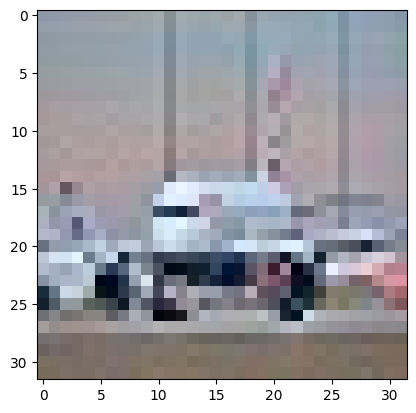

1/1 [==============================] - 0s 16ms/step
Prediction: Car


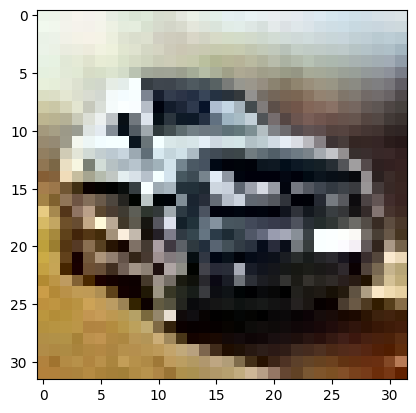

1/1 [==============================] - 0s 15ms/step
Prediction: Truck


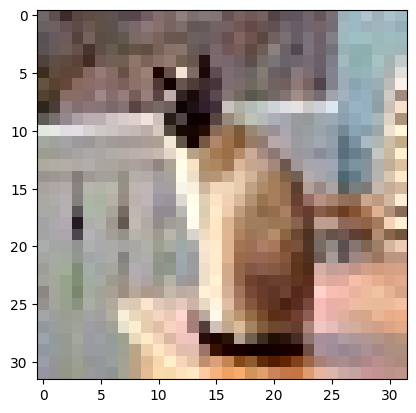

1/1 [==============================] - 0s 15ms/step
Prediction: Horse


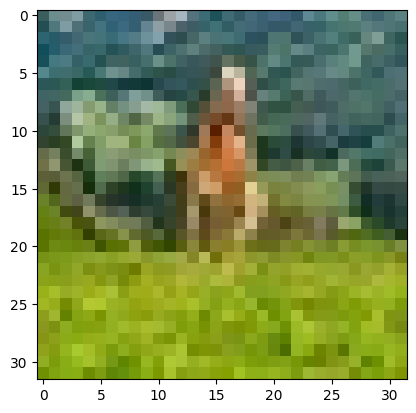

1/1 [==============================] - 0s 15ms/step
Prediction: Horse


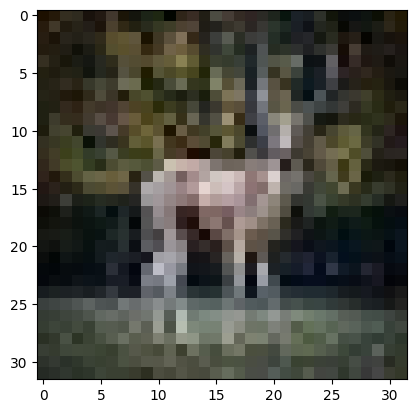

1/1 [==============================] - 0s 15ms/step
Prediction: Deer


In [27]:
# Classifying new images from the internet
# images are courtesy of pixabay
# loading the images and predicting labels

# NOTE: when you load images with opencv and cv.imread() you load them in a BGR color scheme
# however, we are working with RGB colorschemes (training, etc)
# converting color scheme: swapping Blue and Red colors

# Directory containing the images
directory = "New folder"

# Get a list of file names in the directory
file_names = os.listdir(directory)

# Loop over the file names
for file_name in file_names:
    # Create the file path by joining the directory and file name
    file_path = os.path.join(directory, file_name)

    # Load the image
    img = cv.imread(file_path)

    # Check if the image was loaded successfully
    if img is not None:
        # Convert BGR to RGB color space
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Display the image using matplotlib
        plt.imshow(img, cmap=plt.cm.binary)
        plt.show()

        # Performing further processing on the image
        prediction = model.predict(np.array([img]) / 255)
        index = np.argmax(prediction)
        print(f"Prediction: {class_names[index]}")
    else:
        print(f"Failed to load the image: {file_name}")